In [1]:
%tensorflow_version 2.x

In [2]:
import random, os
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.metrics import confusion_matrix

In [3]:
import zipfile
!gdown https://drive.google.com/uc?id=1S9OPO7mUX76_A14dAs2DKyVGXSwP-MnC

Downloading...
From: https://drive.google.com/uc?id=1S9OPO7mUX76_A14dAs2DKyVGXSwP-MnC
To: /content/processed_data.zip
100% 40.8M/40.8M [00:00<00:00, 295MB/s]


In [4]:
zip_ref = zipfile.ZipFile('processed_data.zip')
zip_ref.extractall()
zip_ref.close()

In [5]:
def show_random_image(category):
    path = f'processed_data/train/{category}'
    img_path = random.choice(os.listdir(path))
    img = load_img(path + '/' + img_path)
    plt.imshow(img)
    plt.title(category)

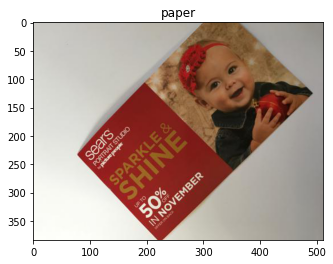

In [6]:
show_random_image('paper')

We can notice that the images come in different sizes, we would need to scale them to a common size before creating the model

In [39]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.3,
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(directory='processed_data/train', target_size=(300, 300), class_mode='categorical', batch_size=16, seed=0)
test_data = test_datagen.flow_from_directory(directory='processed_data/test', target_size=(300, 300), class_mode='categorical', batch_size=16, seed=0)

Found 1665 images belonging to 5 classes.
Found 717 images belonging to 5 classes.


In [19]:
# Model 1
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[300, 300, 3]),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

#model_1.summary()

In [42]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

model_2.fit(train_data, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data), epochs=20)

Epoch 1/20
105/105 [==============================] - 38s 355ms/step - loss: 1.5129 - accuracy: 0.3063 - val_loss: 1.3541 - val_accuracy: 0.3835
Epoch 2/20
105/105 [==============================] - 37s 355ms/step - loss: 1.3645 - accuracy: 0.4036 - val_loss: 1.2752 - val_accuracy: 0.4589
Epoch 3/20
105/105 [==============================] - 37s 354ms/step - loss: 1.4431 - accuracy: 0.3790 - val_loss: 1.2134 - val_accuracy: 0.4644
Epoch 4/20
105/105 [==============================] - 37s 353ms/step - loss: 1.3071 - accuracy: 0.4384 - val_loss: 1.1836 - val_accuracy: 0.5188
Epoch 5/20
105/105 [==============================] - 37s 354ms/step - loss: 1.2468 - accuracy: 0.4829 - val_loss: 1.1630 - val_accuracy: 0.5160
Epoch 6/20
105/105 [==============================] - 37s 352ms/step - loss: 1.2721 - accuracy: 0.4480 - val_loss: 1.1384 - val_accuracy: 0.5286
Epoch 7/20
105/105 [==============================] - 37s 351ms/step - loss: 1.1637 - accuracy: 0.4871 - val_loss: 1.0989 - val_ac

In [52]:

model_2.fit(train_data, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data), epochs=20)

Epoch 1/20
105/105 [==============================] - 37s 353ms/step - loss: 0.7530 - accuracy: 0.7153 - val_loss: 0.9033 - val_accuracy: 0.6555
Epoch 2/20
105/105 [==============================] - 37s 353ms/step - loss: 0.7625 - accuracy: 0.7123 - val_loss: 0.8736 - val_accuracy: 0.6722
Epoch 3/20
105/105 [==============================] - 37s 353ms/step - loss: 0.7627 - accuracy: 0.7015 - val_loss: 0.8991 - val_accuracy: 0.6639
Epoch 4/20
105/105 [==============================] - 37s 352ms/step - loss: 0.6987 - accuracy: 0.7207 - val_loss: 0.8404 - val_accuracy: 0.6764
Epoch 5/20
105/105 [==============================] - 37s 348ms/step - loss: 0.7214 - accuracy: 0.7255 - val_loss: 0.9604 - val_accuracy: 0.6360
Epoch 6/20
105/105 [==============================] - 36s 346ms/step - loss: 0.6938 - accuracy: 0.7435 - val_loss: 0.8880 - val_accuracy: 0.6736
Epoch 7/20
105/105 [==============================] - 37s 347ms/step - loss: 0.6585 - accuracy: 0.7471 - val_loss: 0.8883 - val_ac

In [ ]:
model_1.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

model_1.fit(train_data, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data), epochs=10)

Epoch 1/10
105/105 [==============================] - 47s 424ms/step - loss: 1.7111 - accuracy: 0.2186 - val_loss: 1.6068 - val_accuracy: 0.2078
Epoch 2/10
105/105 [==============================] - 44s 420ms/step - loss: 1.6084 - accuracy: 0.2535 - val_loss: 1.6050 - val_accuracy: 0.2441
Epoch 3/10
105/105 [==============================] - 44s 413ms/step - loss: 1.6037 - accuracy: 0.2474 - val_loss: 1.6026 - val_accuracy: 0.2441
Epoch 4/10
105/105 [==============================] - 44s 418ms/step - loss: 1.6019 - accuracy: 0.2474 - val_loss: 1.6018 - val_accuracy: 0.2441
Epoch 5/10
105/105 [==============================] - 44s 416ms/step - loss: 1.6009 - accuracy: 0.2474 - val_loss: 1.6011 - val_accuracy: 0.2441
Epoch 6/10
105/105 [==============================] - 44s 415ms/step - loss: 1.6002 - accuracy: 0.2474 - val_loss: 1.6007 - val_accuracy: 0.2441
Epoch 7/10
105/105 [==============================] - 44s 417ms/step - loss: 1.5998 - accuracy: 0.2474 - val_loss: 1.6005 - val_ac

In [28]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.3,
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(directory='processed_data/train', target_size=(224, 224), class_mode='categorical', batch_size=16, seed=0)
test_data = test_datagen.flow_from_directory(directory='processed_data/test', target_size=(224, 224), class_mode='categorical', batch_size=16, seed=0)

Found 1665 images belonging to 5 classes.
Found 717 images belonging to 5 classes.


In [22]:
resnet = tf.keras.applications.resnet50.ResNet50(input_shape=[224, 224, 3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [23]:
for layer in resnet.layers:
  layer.trainable=False # Do  not retrain layers

In [29]:
x = tf.keras.layers.Flatten()(resnet.output)
prediction = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(inputs=resnet.input, outputs=prediction)
#model.summary()

In [30]:
es = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer='adam',
               metrics=['accuracy'])

model.fit(train_data, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data), epochs=10, callbacks=es)

Epoch 1/30
105/105 [==============================] - 31s 262ms/step - loss: 3.1380 - accuracy: 0.2991 - val_loss: 2.2428 - val_accuracy: 0.3780
Epoch 2/30
105/105 [==============================] - 26s 247ms/step - loss: 2.1994 - accuracy: 0.3309 - val_loss: 1.5963 - val_accuracy: 0.4003
Epoch 3/30
105/105 [==============================] - 26s 249ms/step - loss: 1.9052 - accuracy: 0.3796 - val_loss: 1.8868 - val_accuracy: 0.3766
Epoch 4/30
105/105 [==============================] - 26s 247ms/step - loss: 2.1073 - accuracy: 0.3520 - val_loss: 1.7752 - val_accuracy: 0.3863
Epoch 5/30
105/105 [==============================] - 26s 249ms/step - loss: 2.7105 - accuracy: 0.3471 - val_loss: 1.7694 - val_accuracy: 0.4700
Epoch 6/30
105/105 [==============================] - 26s 247ms/step - loss: 2.1582 - accuracy: 0.3778 - val_loss: 1.7647 - val_accuracy: 0.4519
Epoch 7/30
105/105 [==============================] - 26s 249ms/step - loss: 1.8957 - accuracy: 0.4342 - val_loss: 2.0517 - val_ac

In [32]:
vgg = tf.keras.applications.vgg16.VGG16(input_shape=[300, 300, 3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [33]:
for layer in vgg.layers:
  layer.trainable=False # Do  not retrain layers

In [35]:
x = tf.keras.layers.Flatten()(resnet.output)
prediction = tf.keras.layers.Dense(5, activation='softmax')(x)

model_3 = tf.keras.models.Model(inputs=resnet.input, outputs=prediction)
model_3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [37]:
es = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer='adam',
               metrics=['accuracy'])

model_3.fit(train_data, validation_data=test_data, steps_per_epoch=len(train_data), validation_steps=len(test_data), epochs=10, callbacks=es)

Epoch 1/10
105/105 [==============================] - 30s 261ms/step - loss: 3.7869 - accuracy: 0.2877 - val_loss: 1.7272 - val_accuracy: 0.3082
Epoch 2/10
105/105 [==============================] - 26s 245ms/step - loss: 2.2977 - accuracy: 0.3225 - val_loss: 2.2401 - val_accuracy: 0.3640
Epoch 3/10
105/105 [==============================] - 26s 247ms/step - loss: 2.2138 - accuracy: 0.3495 - val_loss: 3.3415 - val_accuracy: 0.3487
Epoch 4/10
105/105 [==============================] - 26s 245ms/step - loss: 2.2924 - accuracy: 0.3423 - val_loss: 1.9917 - val_accuracy: 0.4212
Epoch 5/10
105/105 [==============================] - 26s 247ms/step - loss: 2.1473 - accuracy: 0.3946 - val_loss: 2.9798 - val_accuracy: 0.3222
Epoch 6/10
105/105 [==============================] - 26s 246ms/step - loss: 1.8289 - accuracy: 0.4048 - val_loss: 2.3549 - val_accuracy: 0.3780
Epoch 7/10
105/105 [==============================] - 26s 247ms/step - loss: 2.2434 - accuracy: 0.3760 - val_loss: 1.9289 - val_ac

In [53]:
model_2.evaluate(test_data)

45/45 [==============================] - 4s 94ms/step - loss: 0.8489 - accuracy: 0.7238


[0.8488556146621704, 0.723849356174469]

In [54]:
predictions = model_2.predict(test_data)

In [46]:
class_names = test_data.class_indices.keys()

In [47]:
y_test = []
for i in range(len(test_data)):
  _, label = test_data.next()
  y_test.extend(label)


In [55]:
y_pred = np.argmax(predictions, axis=1)

In [49]:
y_test = np.argmax(y_test, axis=1)

In [56]:
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[31 19 17 35 20]
 [24 32 26 34 35]
 [11 26 23 36 28]
 [28 35 37 50 25]
 [23 34 25 34 29]]


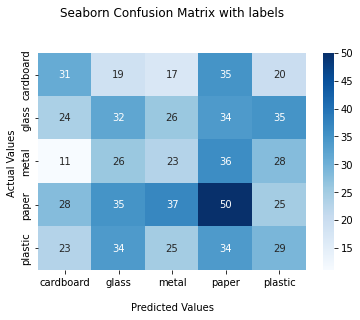

In [57]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

## Display the visualization of the Confusion Matrix.
plt.show()


In [59]:
model_2.save('model.h5')